# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "./Resources/city_data.csv"
ride_data_to_load = "./Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides_by_city_type = pyber_data_df.groupby(['type']).count()['ride_id']

In [4]:
# 2. Get the total drivers for each city type
total_drivers_by_city_type = city_data_df.groupby(['type']).sum()['driver_count']

In [5]:
#  3. Get the total amount of fares for each city type
sum_fare_by_city_type = pyber_data_df.groupby(['type']).sum()['fare']

In [6]:
#  4. Get the average fare per ride for each city type. 
average_fare_by_city_type = sum_fare_by_city_type / total_rides_by_city_type

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_by_driver = sum_fare_by_city_type / total_drivers_by_city_type

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    'Total Rides' : total_rides_by_city_type,
    'Total Drivers' : total_drivers_by_city_type,
    'Total Fares' : sum_fare_by_city_type,
    'Average Fare per Ride' : average_fare_by_city_type,
    'Average Fare per Driver' : average_fare_by_driver
})

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map("{:,}".format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map("{:,}".format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map("${:,}".format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map("${:.2f}".format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map("${:.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
df = pyber_data_df.groupby(['type','date']).sum()['fare']

In [12]:
# 2. In Step 2, use the provided code snippet to reset the index. 
# This is needed to use the pivot() function in the next step (Step 3).
df = df.reset_index()

In [13]:
# 3. In Step 3, use the pivot() function to convert the DataFrame from the previous 
# step so that the index is the "date," 
# each column is a city "type," and the values are the "fare."
df = df.pivot(index='date', columns='type', values='fare')

In [14]:
# 4. In Step 4, create a new DataFrame by using the loc method on 
# the following date range: 2019-01-01 through 2019-04-28. 
df = df.loc['2019-01-01':'2019-04-28']

In [15]:
# 5. In Step 5, use the provided code snippet to reset the index of the DataFrame 
# from the previous step (Step 4) to a datetime data type. 
# This is necessary to use the resample() method in Step 7
df.index = pd.to_datetime(df.index)

In [16]:
# 6. In Step 6, use the provided code snippet, df.info(), to check that the "date" is a datetime data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [17]:
# 7. In Step 7, create a new DataFrame by applying the resample() 
# function to the DataFrame you modified in Step 5. Resample the data in weekly bins, 
# then apply the sum() method to get the total fares for each week.
df = df.resample('W').sum()
df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


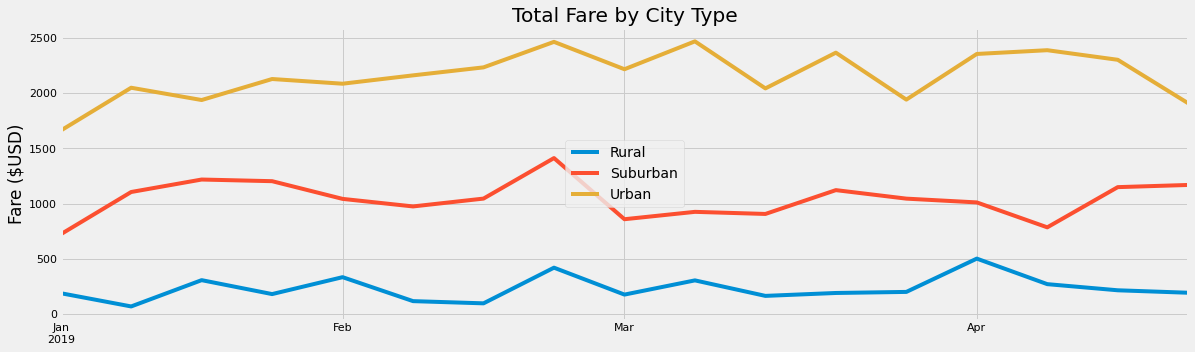

In [18]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
%matplotlib inline
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (18,5)

df.plot(
    y=['Rural','Suburban','Urban'],
    title='Total Fare by City Type',
    fontsize=11,
    ylabel='Fare ($USD)',
    xlabel='')
plt.legend(loc='center')
plt.savefig("./analysis/PyBer_fare_summary.png")